# COVID-19 v České republice

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import json

with urllib.request.urlopen("https://api.apify.com/v2/key-value-stores/K373S4uCFR9W1K8ei/records/LATEST?disableRedirect=true") as url:
    data = json.loads(url.read().decode())
    

    totalPositiveTests = pd.DataFrame(data['totalPositiveTests'])
    totalPositiveTests['date'] = pd.to_datetime(totalPositiveTests['date'], errors='coerce')
    totalPositiveTests['date'] = totalPositiveTests['date'].dt.date
    
    numberOfTested = pd.DataFrame(data['numberOfTestedGraph'])
    numberOfTested['date'] = pd.to_datetime(numberOfTested['date'], errors='coerce')
    numberOfTested['date'] = numberOfTested['date'].dt.date
    
    infectedByRegion = pd.DataFrame(data['infectedByRegion'])
    infectedByRegion.set_index('name', inplace = True) 
    
    infectedDaily = pd.DataFrame(data['infectedDaily'])  
    infectedDaily['date'] = pd.to_datetime(infectedDaily['date'], errors='coerce')
    infectedDaily['date'] = infectedDaily['date'].dt.date
    

## Základní data

In [2]:
print(f'Celkový počet testovaných: {data["totalTested"]}')
print(f'Celkový počet pozitivně testovaných: {data["infected"]}')
print(f'Celkový počet aktivních případů: {data["infected"]-data["recovered"]-data["deceased"]}')
print(f'Celkový počet vyléčených: {data["recovered"]}')
print(f'Celkový počet mrtvých: {data["deceased"]}')

Celkový počet testovaných: 106845
Celkový počet pozitivně testovaných: 5467
Celkový počet aktivních případů: 5054
Celkový počet vyléčených: 301
Celkový počet mrtvých: 112


## Vývoj celkového počtu pozitivně testovaných

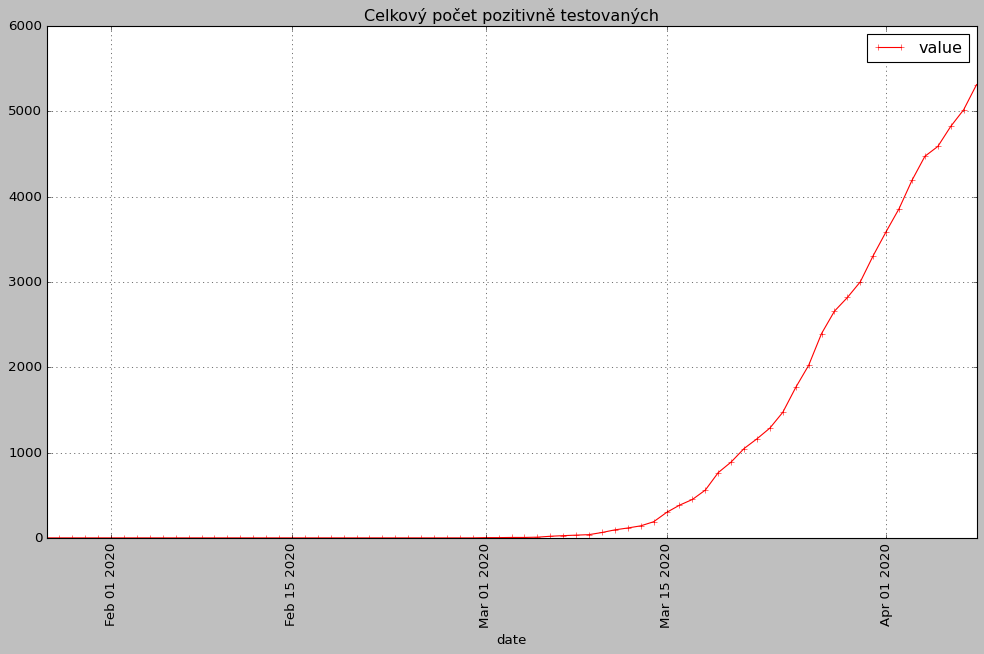

In [3]:
plt.style.use('classic')
totalPositiveTests.plot(x='date', 
                        y='value', 
                        kind='line', 
                        style='r+-',
                        figsize=(15, 8),
                        grid=True, 
                        title='Celkový počet pozitivně testovaných')
plt.xticks(rotation=90)
plt.show()

In [4]:
totalPositiveTests.tail(10)

,value,date
63,3001,2020-03-30
64,3308,2020-03-31
65,3589,2020-04-01
66,3858,2020-04-02
67,4190,2020-04-03
68,4472,2020-04-04
69,4587,2020-04-05
70,4822,2020-04-06
71,5017,2020-04-07
72,5312,2020-04-08


## Denní vývoj počtu pozitivně testovaných

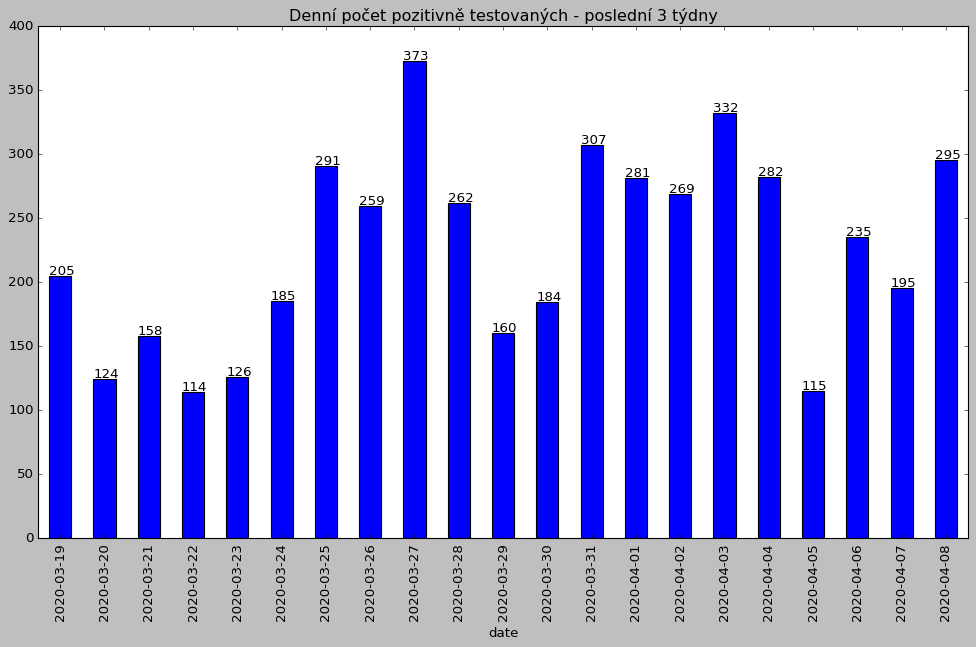

In [5]:
ax = infectedDaily[-21:].plot(x='date', 
                              y='value', 
                              kind='bar', 
                              figsize=(15, 8),
                              legend=False,
                              title='Denní počet pozitivně testovaných - poslední 3 týdny')
x_offset = -0.25
y_offset = 1.2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()

## Vývoj počtu celkově testovaných

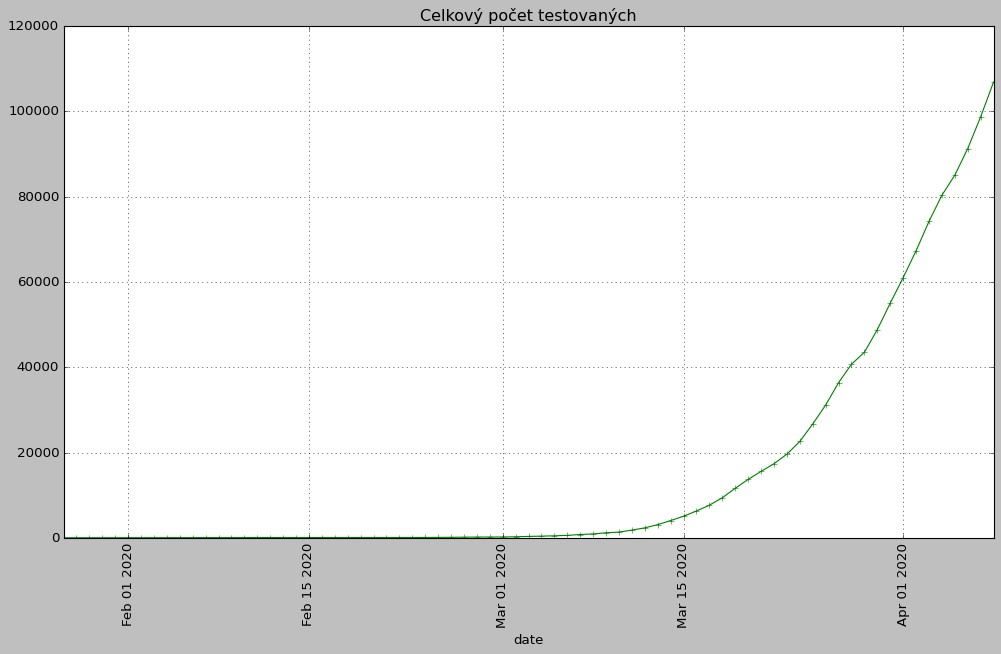

In [7]:
numberOfTested.plot(x='date', 
                    y='value', 
                    kind='line',
                    style='g+-',
                    figsize=(15, 8), 
                    grid=True, 
                    legend='',
                    title='Celkový počet testovaných')
plt.xticks(rotation=90)
plt.show()

In [8]:
numberOfTested['daily'] = numberOfTested['value'] - numberOfTested['value'].shift(1)
numberOfTested.tail(10)

,value,date,daily
63,48811,2020-03-30,5313.0
64,55017,2020-03-31,6206.0
65,60990,2020-04-01,5973.0
66,67281,2020-04-02,6291.0
67,74170,2020-04-03,6889.0
68,80304,2020-04-04,6134.0
69,85014,2020-04-05,4710.0
70,91247,2020-04-06,6233.0
71,98681,2020-04-07,7434.0
72,106845,2020-04-08,8164.0


## Vývoj počtu denně testovaných

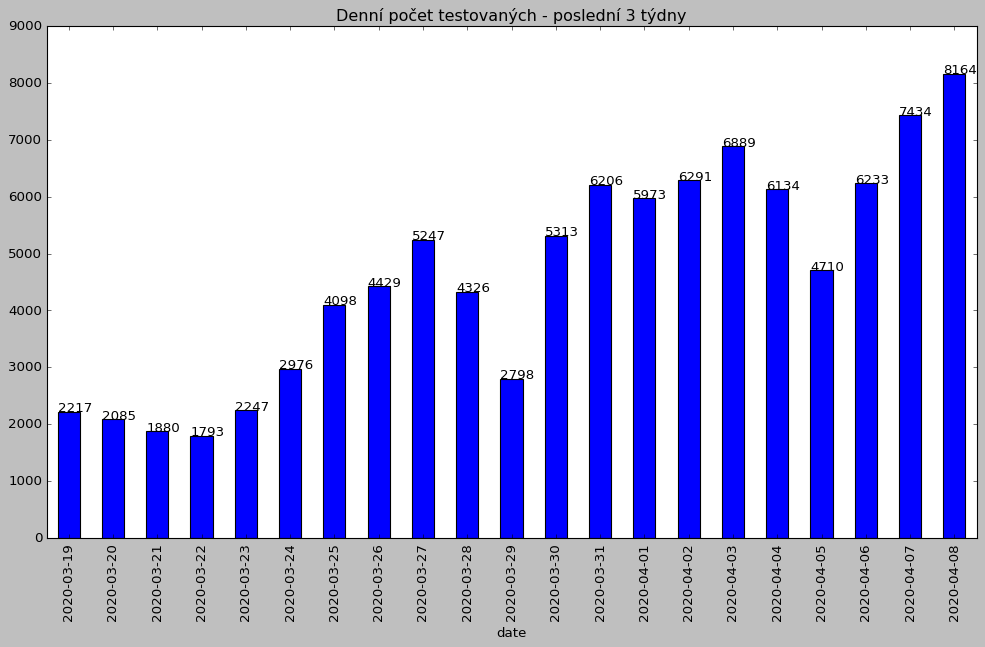

In [9]:
ax = numberOfTested[-21:].plot(x='date', 
                              y='daily', 
                              kind='bar', 
                              figsize=(15, 8),
                              legend=False,
                              title='Denní počet testovaných - poslední 3 týdny')
x_offset = -0.25
y_offset = 1.2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()

## Růstový faktor

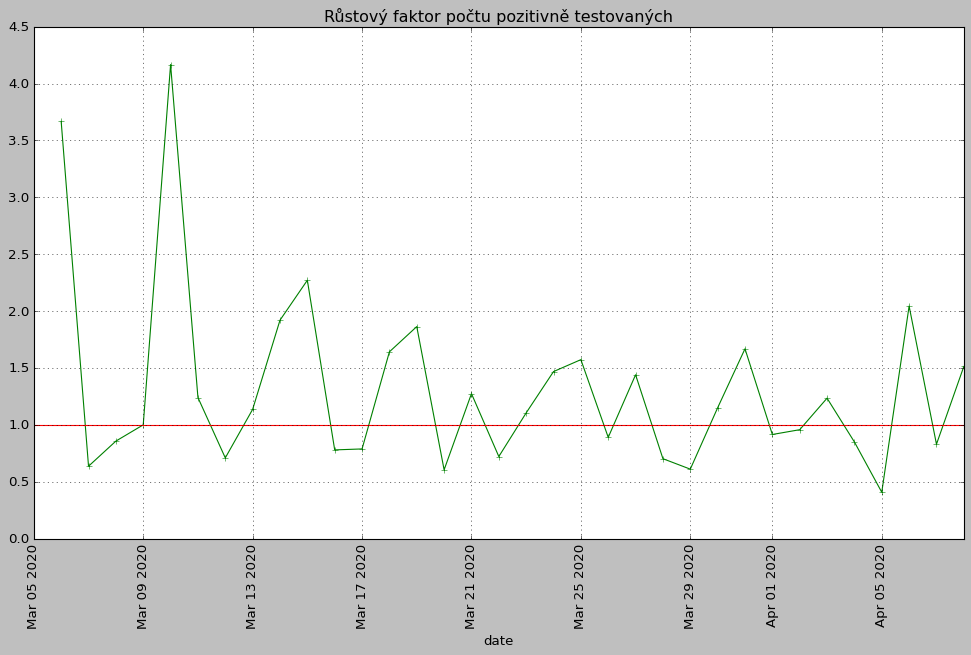

In [10]:
infectedDaily['growthFactor'] = infectedDaily['value'] / infectedDaily['value'].shift(1)
infectedDaily['ones'] = 1
p = infectedDaily[38:].plot(x='date', 
                    y=['growthFactor','ones'], 
                    kind='line',
                    style=['g+-', 'r-'],
                    figsize=(15, 8), 
                    grid=True, 
                    legend=False,
                    title='Růstový faktor počtu pozitivně testovaných')
plt.xticks(rotation=90)
plt.show()

## Počet infikovaných podle krajů

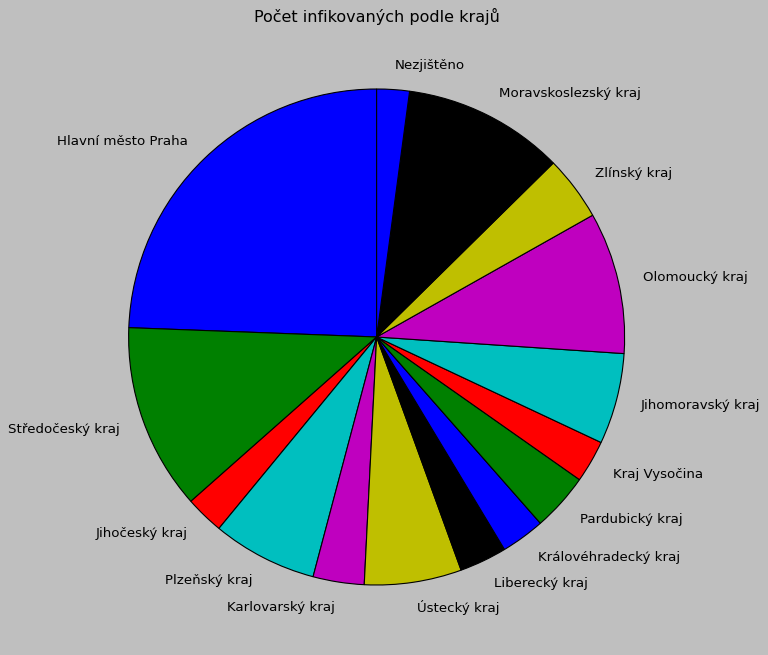

In [11]:
infectedByRegion.plot.pie(y='value', 
                          figsize=(10, 10), 
                          startangle=90, 
                          title="Počet infikovaných podle krajů", 
                          legend=False, 
                          label='')
plt.show()

## Vývoj průměrného denního nárůstu pozitivně testovaných 
__(průměr za posledních 5 dní)__

In [12]:
totalPositiveTests['increase']=0
df = totalPositiveTests
totalPositiveTests['increase'] = (totalPositiveTests['value'] - \
                                  totalPositiveTests['value'].shift(1)) / \
                                  totalPositiveTests['value'].shift(1)
totalPositiveTests['increase5days'] = (totalPositiveTests['increase'] + \
                                       totalPositiveTests['increase'].shift(1) + \
                                       totalPositiveTests['increase'].shift(2) + \
                                       totalPositiveTests['increase'].shift(3) + \
                                       totalPositiveTests['increase'].shift(4)) / 5
totalPositiveTests.tail()


,value,date,increase,increase5days
68,4472,2020-04-04,0.067303,0.083111
69,4587,2020-04-05,0.025716,0.067794
70,4822,2020-04-06,0.051232,0.061051
71,5017,2020-04-07,0.040440,0.054149
72,5312,2020-04-08,0.058800,0.048698


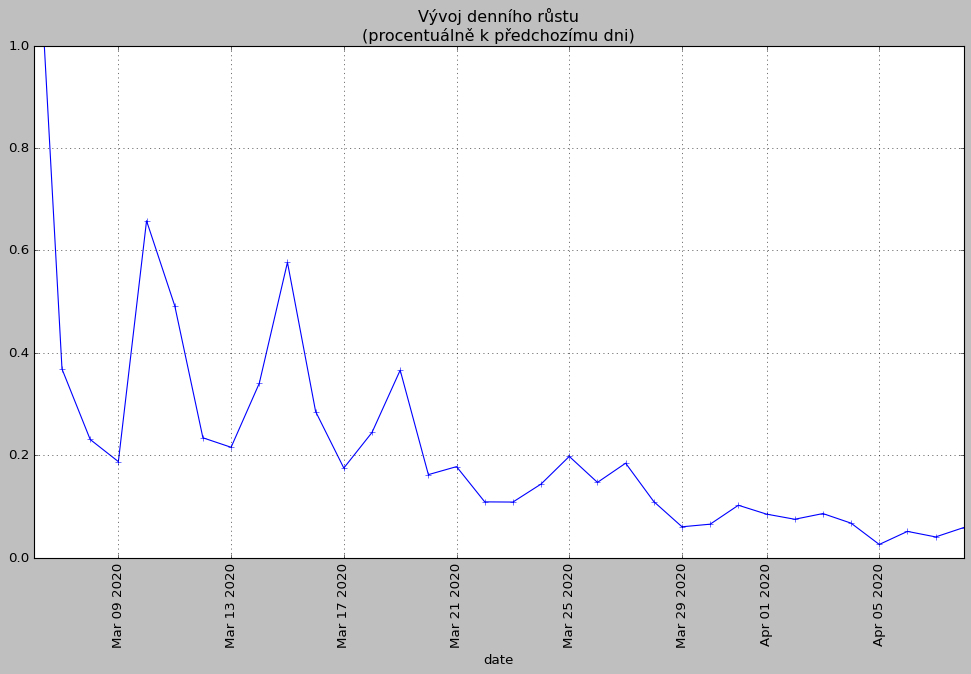

In [13]:
df[39:].plot(x='date',
             y='increase', 
             kind='line', 
             figsize=(15, 8), 
             grid=True, 
             legend=False,
             ylim=(0,1),
             style='b+-',
             title='Vývoj denního růstu\n(procentuálně k předchozímu dni)')
plt.xticks(rotation=90)
plt.show()

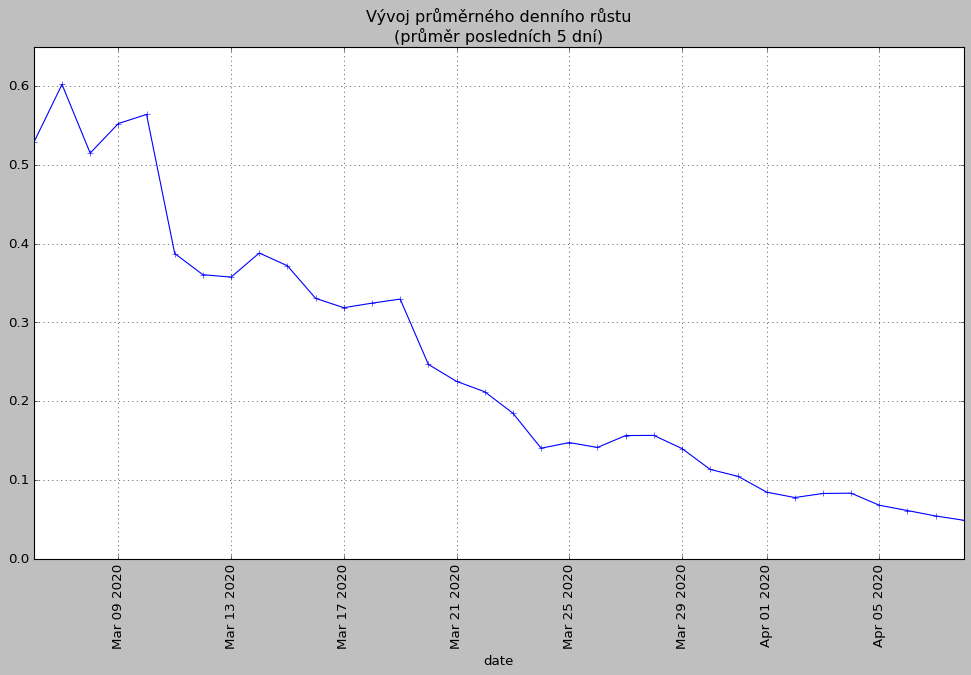

In [14]:
df[39:].plot(x='date',
             y='increase5days', 
             kind='line', 
             figsize=(15, 8), 
             grid=True, 
             legend=False,
             ylim=(0,0.65),
             style='b+-',
             title='Vývoj průměrného denního růstu\n(průměr posledních 5 dní)')
plt.xticks(rotation=90)
plt.show()